# Data Wrangling Project

## Gather

In [1]:
import pandas as pd
import requests
import json
import numpy as np
%matplotlib inline

#### Gather twitter-archive-enhanced.csv

In [2]:
twitterarchiveenhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### Gather image-predictions.tsv

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.content
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)
imagepredict = pd.read_csv('image-predictions.tsv', sep = '\t')

#### Gather twitter json txt file

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# twitterarchiveenhanced is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitterarchiveenhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
#print(fails_dict)

359.95629555400023


In [4]:
url = "https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(url)
response.content
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [5]:
# https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas
with open('tweet-json.txt') as file:
    status_list = []
    for line in file:
        #print(line)
        status_list.append(json.loads(line))

In [6]:
tweetjson = pd.DataFrame(status_list)
tweetjson.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
tweetjson = tweetjson[['id', 'favorite_count', 'retweet_count']]
tweetjson.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assess

### twitterarchiveenhanced

In [8]:
twitterarchiveenhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitterarchiveenhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,None,None,None,None
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


In [10]:
# Display the first five rows of the DataFrame using .head
twitterarchiveenhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Display the last five rows of the DataFrame using .tail
twitterarchiveenhanced.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
# Display a basic summary of the DataFrame using .info
twitterarchiveenhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitterarchiveenhanced[twitterarchiveenhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [14]:
# Display the entry counts for the name column using .value_counts
twitterarchiveenhanced['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
Toby           7
an             7
Buddy          7
Jack           6
Jax            6
Scout          6
Leo            6
Dave           6
Stanley        6
Rusty          6
Oscar          6
Koda           6
Bella          6
Milo           6
Oakley         5
            ... 
Buckley        1
Amélie         1
Crimson        1
Trevith        1
Emanuel        1
Remus          1
by             1
Walker         1
Hall           1
Ralphy         1
Trigger        1
Mac            1
Marty          1
Chaz           1
Tommy          1
Emma           1
Taz            1
Finnegus       1
Philippe       1
Wafer          1
Tayzie         1
Blue           1
Liam           1
Beckham        1
Wiggles        1
Edmund         1
Tess           1
Callie        

In [15]:
twitterarchiveenhanced.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

### imagepredict

In [16]:
imagepredict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
imagepredict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
1660,811627233043480576,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.396280,True,Pembroke,0.049562,True,wire-haired_fox_terrier,0.046349,True
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True


In [18]:
# Display the first five rows of the DataFrame using .head
imagepredict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Display the last five rows of the DataFrame using .tail
imagepredict.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
# Display a basic summary of the DataFrame using .info
imagepredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### tweetjson

In [21]:
tweetjson.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [22]:
tweetjson.sample(5)

,id,favorite_count,retweet_count
748,779124354206535695,0,21324
685,788070120937619456,0,3952
2147,669684865554620416,551,99
1740,679462823135686656,34856,21324
87,875097192612077568,27997,6342


In [23]:
# Display the first five rows of the DataFrame using .head
tweetjson.head(5)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [24]:
# Display the last five rows of the DataFrame using .tail
tweetjson.tail(5)

,id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [25]:
# Display a basic summary of the DataFrame using .info
tweetjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality Issues
- twitterarchiveenhanced dataframe: Missing values in expanded_urls
- twitterarchiveenhanced dataframe: Missing values in column name, specifically "None" in the name column look to be a missing name
- twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "a" in the name column does not look to be a correct name
- twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "the" in the name column does not look to be a correct name
- twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "an" in the name column does not look to be a correct name
- twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "quite" in the name column does not look to be a correct name. It is providing name from the tweet for tweet id 859196978902773760.
- twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 666287406224695296, has text: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv. But the rating is given as 1/2 instead of 9/10.
- twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 832088576586297345, has text: "@docmisterio account started on 11/15/15". The rating is given as 11/15 instead of NaN.
- twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 835246439529840640, has text: "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho". But the rating is given as 960/0 instead of 13/10.
- twitterarchiveenhanced dataframe: Retweet data is present. I only want to use original tweets.

### Tydiness Issues
- twitterarchiveenhanced dataframe: doggo, floofer, pupper, puppo should form one 'Dog_stages' column since this is one variable
- twitterarchiveenhanced dataframe: column "text" has text and text_url present in same column. This should be present in separate columns as: text and text_url

## Clean

### Missing Values

- Missing values in expanded_urls: I do not have a way to replace the missing urls with meaningful values
- Missing values in column name, specifically "None" in the name column look to be a missing name: I do not have a way to replace the missing names with meaningful values

### Tydiness

#### twitterarchiveenhanced dataframe: column "text" has text and text_url present in same column. This should be present in separate columns as: text and text_url


#### Define
- Extract the *text_url* variables from the *text* column using pandas' `str.split` method. Create the *text_url* column when done.

#### Code

In [26]:
df_clean = twitterarchiveenhanced.copy()
dftemp = pd.DataFrame(twitterarchiveenhanced.text.str.split('https',1).tolist(),
                                   columns = ['text','text_url'])
dftemp['text_url'] = 'https' + dftemp['text_url']
df_clean['text'] = dftemp['text']
df_clean['text_url'] = dftemp['text_url']

#### Test

In [27]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,https://t.co/9TwLuAGH0b
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,https://t.co/t1bfwz5S2A


In [28]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'text_url'],
      dtype='object')

#### doggo, floofer, pupper, puppo should form one 'Dog_stages' column since this is one variable

#### Define
- Combine the *doggo*, *floofer*, *pupper*, *puppo* columns to a *dog_stage* column

#### Code

In [29]:
df_clean['dogstages'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']
df_clean['dogstages'][df_clean['dogstages'] != "NoneNoneNoneNone"] = df_clean['dogstages'][df_clean['dogstages'] != "NoneNoneNoneNone"].str.replace("None", "")
df_clean['dogstages'][df_clean['dogstages'] == "NoneNoneNoneNone"] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Test

In [30]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_url,dogstages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,https://t.co/kQ04fDDRmh,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,https://t.co/v0nONBcwxq,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,https://t.co/9TwLuAGH0b,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,https://t.co/t1bfwz5S2A,doggo


### Quality

#### twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "a" in the name column does not look to be a correct name

#### twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "the" in the name column does not look to be a correct name

#### twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "an" in the name column does not look to be a correct name

#### twitterarchiveenhanced dataframe: Incorrect representations of values in column name, specifically "quite" in the name column does not look to be a correct name. It is providing name from the tweet for tweet id 859196978902773760.


#### Define
- Select all records in the 'name' column that have : "a", "an", "the", "quite" and replace the text in those cells with None

#### Code

In [31]:
df_clean = twitterarchiveenhanced.copy()
name_inconsistent_list = ["a", "an", "the", "quite"]
for inconsint_name in name_inconsistent_list:
    df_clean.name.replace(inconsint_name, None, inplace=True)

In [32]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Test

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [34]:
df_clean.name.value_counts()

None         780
Oliver        13
Charlie       12
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Daisy          8
Sadie          8
Toby           7
Buddy          7
Stanley        7
Bailey         7
Leo            6
Bella          6
Scout          6
Walter         6
Jax            6
Jack           6
Milo           6
Rusty          6
Oscar          6
Koda           6
Dave           6
Sammy          5
Chester        5
Louis          5
            ... 
Amélie         1
Crimson        1
Trevith        1
Emanuel        1
Brownie        1
Lambeau        1
Venti          1
Mary           1
Remus          1
Holly          1
Marty          1
Chaz           1
Tommy          1
Emma           1
Taz            1
Finnegus       1
Hall           1
Philippe       1
Tayzie         1
Blue           1
Liam           1
Beckham        1
Wiggles        1
Edmund         1
Tess           1
Callie         1
Perry          1
Wafer         

In [35]:
for inconsint_name in name_inconsistent_list:
    assert inconsint_name not in df_clean.name.values

In [36]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326      Walter
2327      Walter
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

#### twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 666287406224695296, has text: This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv. But the rating is given as 1/2 instead of 9/10.


#### Define
- Replace the rating for tweet_id 666287406224695296 to 9/10 from 1/2

#### Code

In [37]:
df_clean['rating_numerator'][df_clean['tweet_id'] == 666287406224695296] = 9
df_clean['rating_denominator'][df_clean['tweet_id'] == 666287406224695296] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [38]:
print(df_clean['rating_numerator'][df_clean['tweet_id'] == 666287406224695296])
print(df_clean['rating_denominator'][df_clean['tweet_id'] == 666287406224695296])

2335    9
Name: rating_numerator, dtype: int64
2335    10
Name: rating_denominator, dtype: int64


#### twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 832088576586297345, has text: "@docmisterio account started on 11/15/15". The rating is given as 11/15 instead of NaN.

#### Define
- Replace the rating for tweet_id 832088576586297345 to NaN from 11/15

#### Code

In [39]:
df_clean['rating_numerator'][df_clean['tweet_id'] == 832088576586297345] = np.NaN
df_clean['rating_denominator'][df_clean['tweet_id'] == 832088576586297345] = np.NaN

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [40]:
print(df_clean['rating_numerator'][df_clean['tweet_id'] == 832088576586297345])
print(df_clean['rating_denominator'][df_clean['tweet_id'] == 832088576586297345])

342   NaN
Name: rating_numerator, dtype: float64
342   NaN
Name: rating_denominator, dtype: float64


#### twitterarchiveenhanced dataframe: Incorrect values for some rows for column rating_numerator and rating_denominator. For example, tweet_id 835246439529840640, has text: "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho". But the rating is given as 960/0 instead of 13/10.

#### Define
- Replace the rating for tweet_id 835246439529840640 to 13/10 from 960/0

#### Code

In [41]:
df_clean['rating_numerator'][df_clean['tweet_id'] == 835246439529840640] = 13
df_clean['rating_denominator'][df_clean['tweet_id'] == 835246439529840640] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [42]:
print(df_clean['rating_numerator'][df_clean['tweet_id'] == 835246439529840640])
print(df_clean['rating_denominator'][df_clean['tweet_id'] == 835246439529840640])

313    13.0
Name: rating_numerator, dtype: float64
313    10.0
Name: rating_denominator, dtype: float64


#### twitterarchiveenhanced dataframe: Retweet data is present. I only want to use original tweets.

#### Define
- Remove retweets. We only want original ratings.

#### Code

In [43]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

#### Test

In [44]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### Define
- Join with imagepredict and tweetjson 

#### Code

In [45]:
df_clean = pd.merge(df_clean, imagepredict, on=['tweet_id'], how='left')

# Rename column id in tweetjson to tweet_id and then merge
tweetjson = tweetjson.rename(index=str, columns={"id": "tweet_id"})
df_clean = pd.merge(df_clean, tweetjson, on=['tweet_id'], how='left')

#### Test

In [46]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,3261
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,2158
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,16716
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,4429
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711


## Store

In [47]:
# Store the clean dataframe in csv file
df_clean.to_csv('twitter_archive_master.csv')

# Analysis & Visualization

### Load Clean data

In [48]:
df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [49]:
# Number of None names (numerator)
None_counts = df_clean.name.value_counts()['None']
None_counts

714

In [50]:
# Number of non-empty names (denominator)
non_empty_counts = df_clean.name.count()
non_empty_counts

2175

In [51]:
# Percentage of None names i.e. no meaningful name
None_counts / non_empty_counts

0.32827586206896553

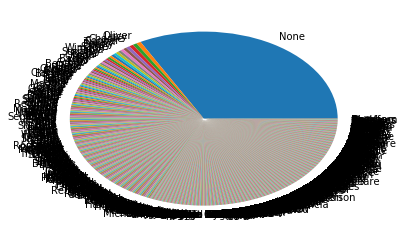

In [52]:
labels = np.full(len(df_clean.name.value_counts()), "", dtype=object)
df_clean.name.value_counts().plot(kind="pie")

### Original data

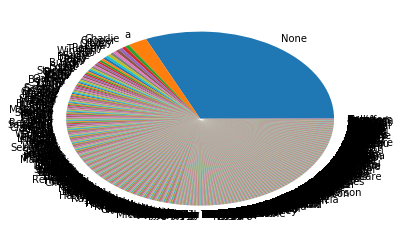

In [53]:
twitterarchiveenhanced = pd.read_csv('twitter-archive-enhanced.csv')
labels = np.full(len(twitterarchiveenhanced.name.value_counts()), "", dtype=object)
labels[0] = None
twitterarchiveenhanced.name.value_counts().plot(kind="pie")

### Ratings Analysis

In [54]:
df_clean['ratings'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [55]:
df_clean['ratings'].sort_values()

265       0.000000
840       0.000000
1761      0.100000
2080      0.100000
1912      0.100000
1690      0.100000
1267      0.100000
1859      0.100000
2157      0.100000
2058      0.200000
1582      0.200000
1585      0.200000
987       0.200000
1741      0.200000
2129      0.200000
2145      0.200000
2067      0.200000
2168      0.200000
1900      0.200000
1419      0.200000
2023      0.300000
1422      0.300000
2004      0.300000
618       0.300000
1657      0.300000
1768      0.300000
1070      0.300000
1749      0.300000
1759      0.300000
1957      0.300000
           ...    
70        1.400000
161       1.400000
160       1.400000
180       1.400000
105       1.400000
61        1.400000
183       1.400000
159       1.400000
352       1.400000
357       1.400000
98        1.400000
753       1.400000
313       1.400000
310       1.400000
875       1.400000
529       1.400000
53        1.400000
38        1.400000
247       1.500000
52        1.700000
1533      2.600000
617       2.

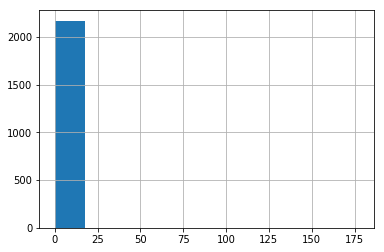

In [56]:
# Plot histogram of ratings
df_clean['ratings'].hist()

In [57]:
df_clean['ratings'].mean() - df_clean['ratings'].median()

0.12384228007503051

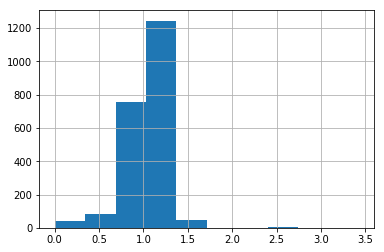

In [58]:
# Plot histogram of ratings removing outliers
df_clean['ratings'][df_clean['ratings'] < 7].hist()

In [59]:
df_clean['ratings'][df_clean['ratings'] < 7].mean() - df_clean['ratings'][df_clean['ratings'] < 7].median()

-0.036008709924761684

#### Outlier rating values larger than 7 (7 such values out of total 2356 ratings) make the ratings distribution skewed to the right. Without these outliers, ratings distribution is slightly left skewed.

### Scatterplots of Ratings Against Favorite_Count

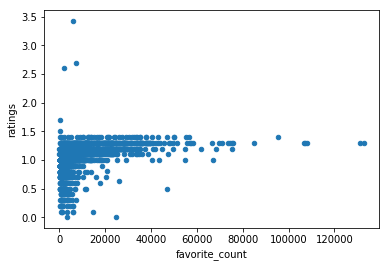

In [60]:
df_clean = df_clean[(df_clean['ratings'] < 7)]
df_clean.plot(x = 'favorite_count', y = 'ratings', kind = 'scatter')

In [61]:
print("Correlation between ratings and favorite_count: {}".format(df_clean['ratings'].corr(df_clean['favorite_count'])))

Correlation between ratings and favorite_count: 0.3619254473141308


#### Ratings and Favorite count have a positive relationship: Higher favorite count generally has higher rating. This can also be seen in positive correlation value between ratings and favorite_count: 0.266


### Scatterplots of Ratings Against Retweet_Count

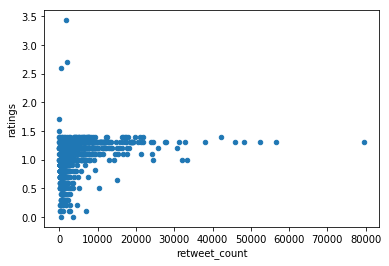

In [62]:
df_clean.plot(x = 'retweet_count', y = 'ratings', kind = 'scatter')

In [63]:
print("Correlation between ratings and retweet_count: {}".format(df_clean['ratings'].corr(df_clean['retweet_count'])))

Correlation between ratings and retweet_count: 0.2732027815178464


#### Ratings and retweet count have a positive relationship: Higher tweet count generally has higher rating. This can also be seen in positive correlation value between ratings and retweet_count: 0.208